In [20]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [21]:
# Fazer leitura do .csv
person = pd.read_csv("data/16P.csv", encoding='ISO-8859-1')

In [22]:
# Verificar as primeiras linhas do dataset e seus tipos
person.info()
person.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 62 columns):
 #   Column                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                --------------  ----- 
 0   Response Id                                                                                                           59999 non-null  int64 
 1   You regularly make new friends.                                                                                       59999 non-null  int64 
 2   You spend a lot of your free time exploring various random topics that pique your interest                            59999 non-null  int64 
 3   Seeing other people cry can easily make you feel like you want to cry too                                             59999 non-null  int64 
 4   You often 

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ


Após fazer uma verificação inicial, as colunas do dataframe estão todas no formato int64. Exceto a coluna dos tipos das personalidades.

In [23]:
# Verificar a quantidade de personalidades 
person['Personality'].value_counts()

Personality
ESFP    3769
INFJ    3761
ENFP    3760
ENTP    3760
ESTJ    3759
ISTJ    3756
ISTP    3755
ESTP    3749
ISFP    3746
ESFJ    3746
ENFJ    3743
INTJ    3743
INTP    3742
ISFJ    3739
ENTJ    3737
INFP    3734
Name: count, dtype: int64

In [24]:
# Mapeando as personalidades
mapa = {'ESFJ': 0, 'ESFP': 1, 'ESTJ': 2, 'ESTP': 3, 'ENFJ': 4, 'ENFP': 5,
         'ENTJ': 6, 'ENTP': 7, 'ISFJ': 8, 'ISFP': 9, 'ISTJ': 10, 'ISTP': 11,
           'INFJ': 12, 'INFP': 13, 'INTJ': 14, 'INTP': 15}

In [25]:
# Substituir as personalidades pelos valores mapeados
person['Personality'] = person['Personality'].replace(mapa)

# Dropar a coluna 'Response Id'
person.drop('Response Id', axis=1, inplace= True)

person.head()

,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,Even a small mistake can cause you to doubt your overall abilities and knowledge.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,-1,0,0,0,0,0,5
1,0,0,-2,-3,-1,2,-2,0,3,0,...,0,-2,0,2,0,-1,-1,-1,3,9
2,0,0,2,0,-1,2,0,0,1,0,...,0,2,0,2,-1,0,1,2,1,12
3,0,-1,3,-1,0,0,-2,0,-2,0,...,0,0,-1,-1,0,1,0,-2,-1,11
4,0,0,-1,0,2,-1,-2,0,1,0,...,0,1,0,2,0,1,-1,2,-1,4


In [26]:
#Para trabalhar mais facilmente com as colunas, mudei o nome delas para o índice que elas estão
mapping = {col: i for i, col in enumerate(person.columns)}
person.rename(columns=mapping, inplace=True)

person.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,-1,0,0,0,0,0,5
1,0,0,-2,-3,-1,2,-2,0,3,0,...,0,-2,0,2,0,-1,-1,-1,3,9
2,0,0,2,0,-1,2,0,0,1,0,...,0,2,0,2,-1,0,1,2,1,12
3,0,-1,3,-1,0,0,-2,0,-2,0,...,0,0,-1,-1,0,1,0,-2,-1,11
4,0,0,-1,0,2,-1,-2,0,1,0,...,0,1,0,2,0,1,-1,2,-1,4


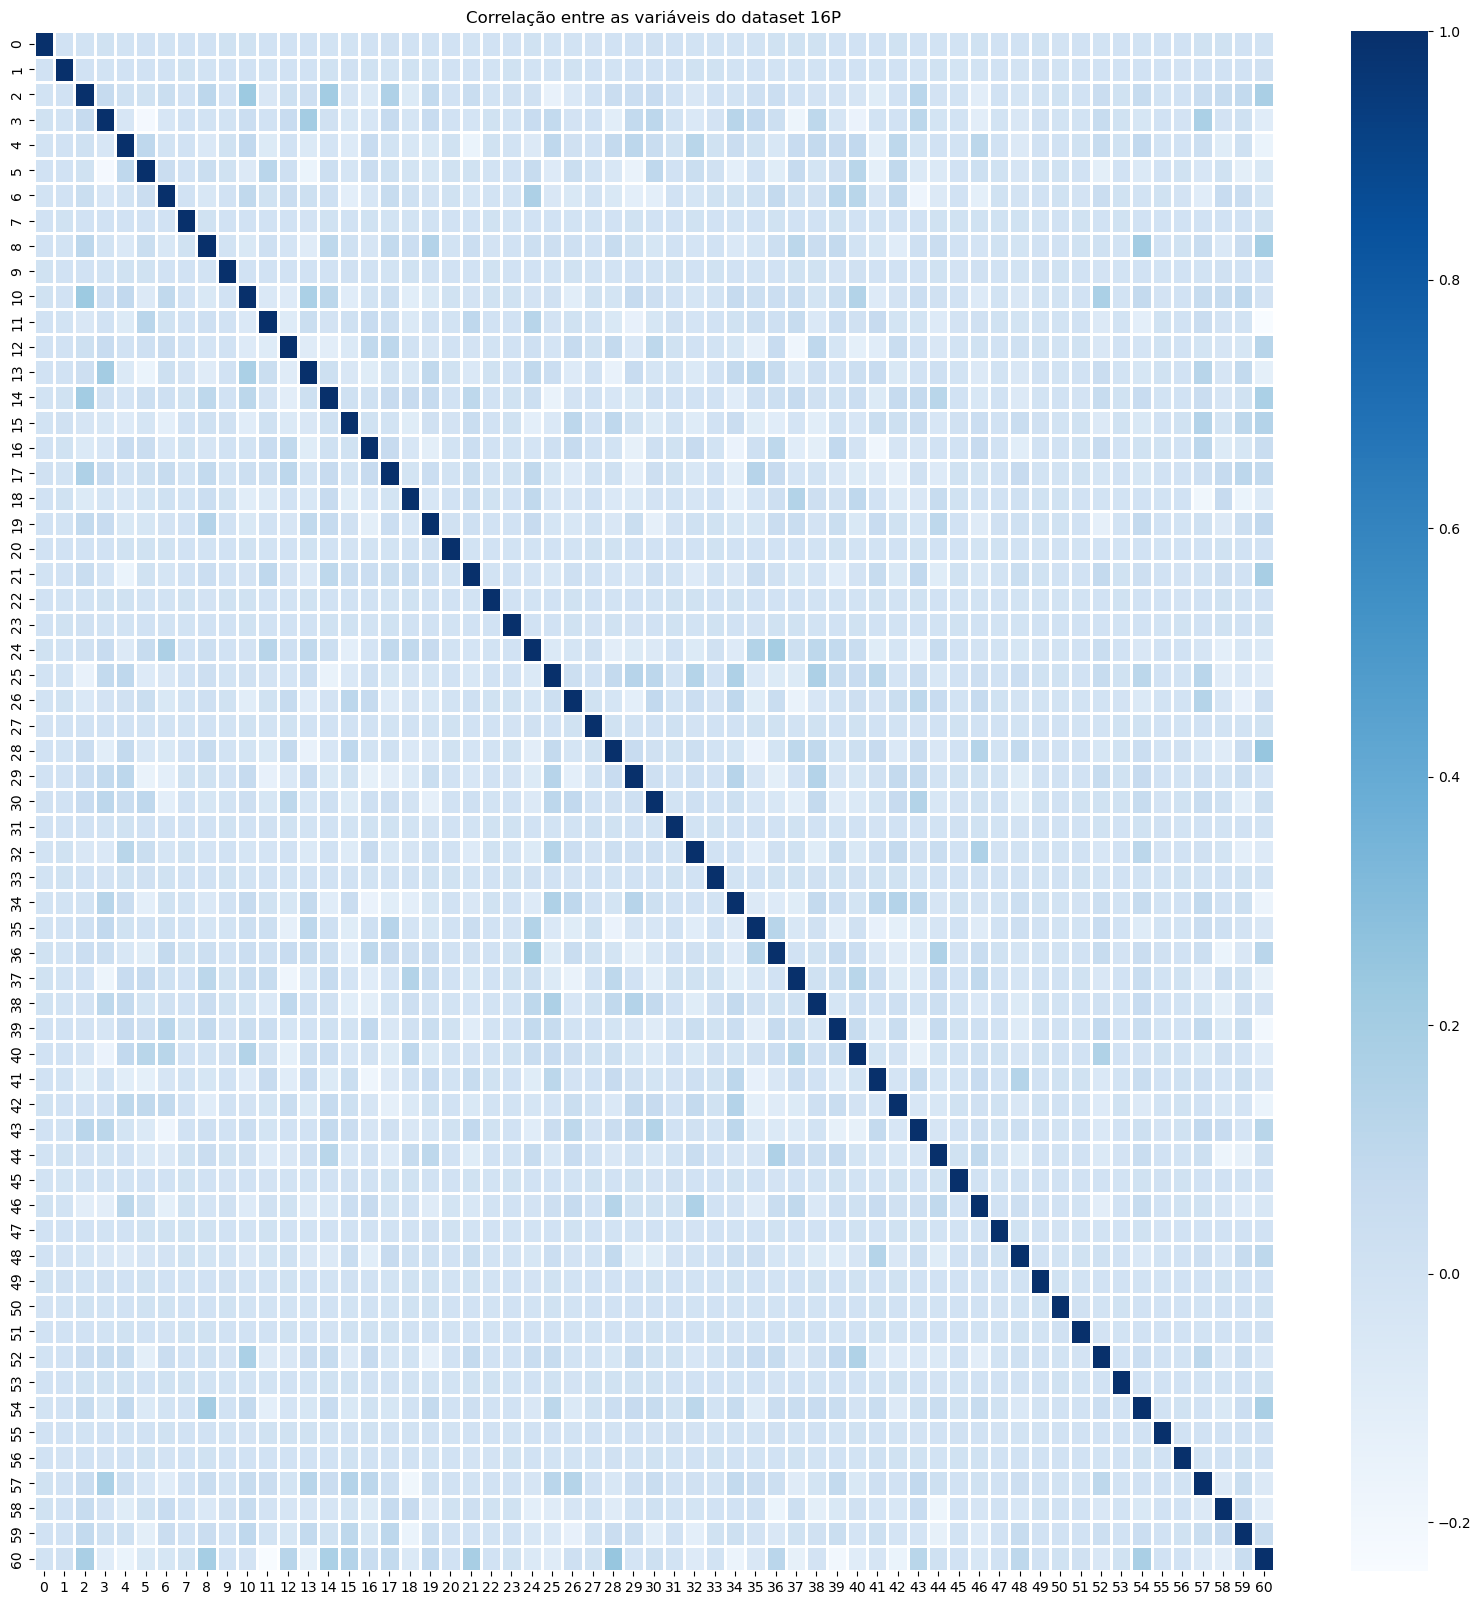

In [30]:
# Traçando um gráfico de correlação pra ver quais colunas tem maior correlação com outras.
plt.figure(figsize=(20,20))
sns.heatmap(person.corr(), cmap='Blues', fmt='.2f', linewidths=2)
plt.title('Correlação entre as variáveis do dataset 16P')
plt.show()
#Eu sei que isso ta horrivel foi só pra testar mesmo

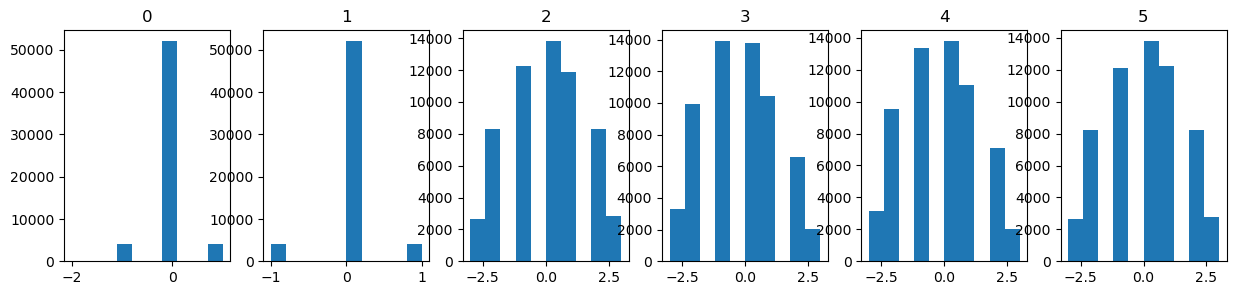

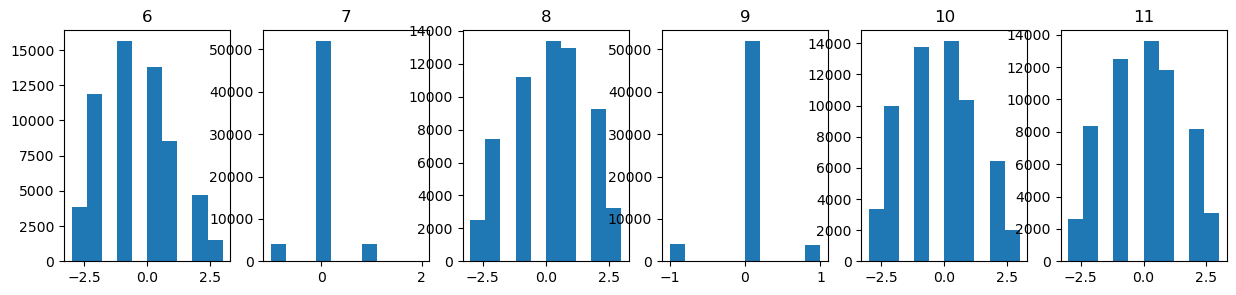

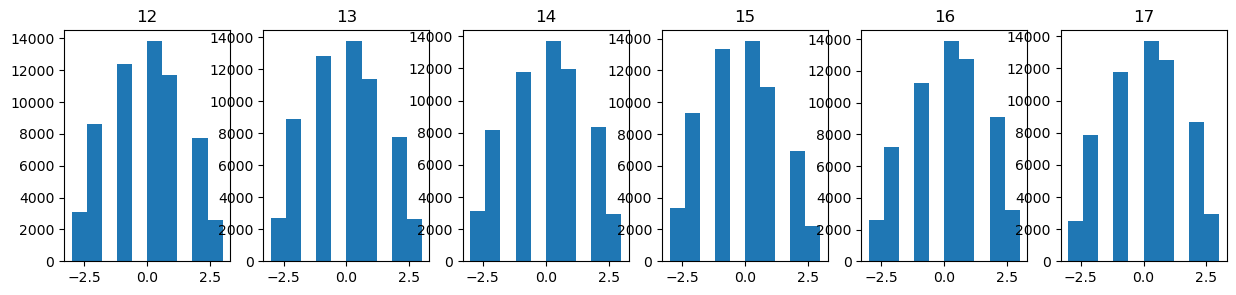

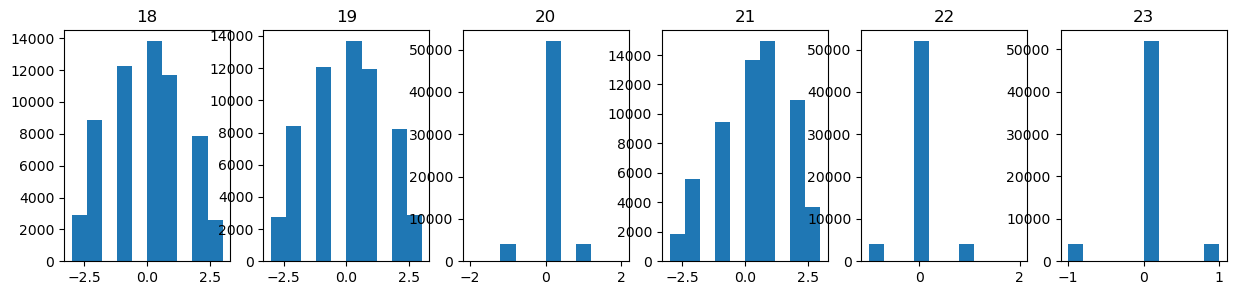

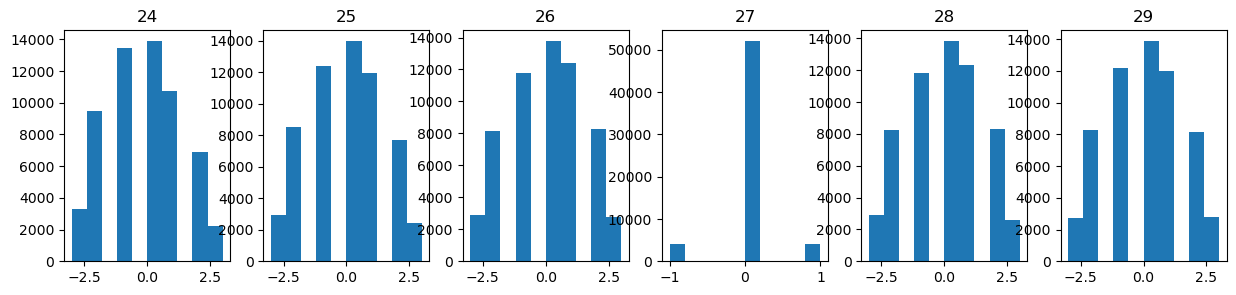

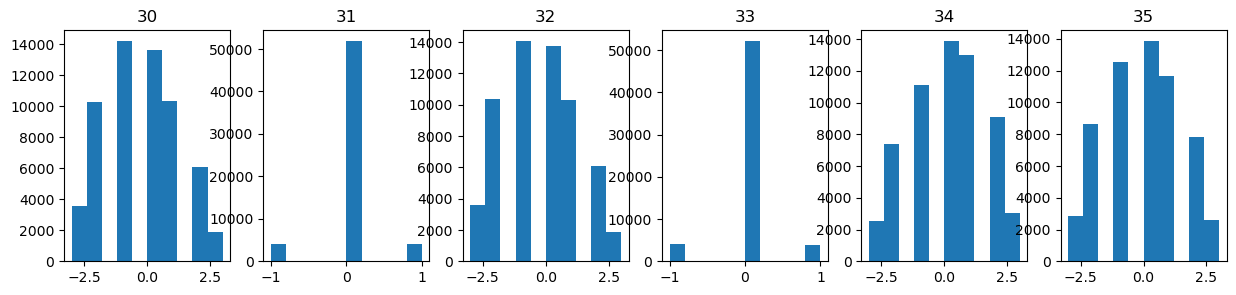

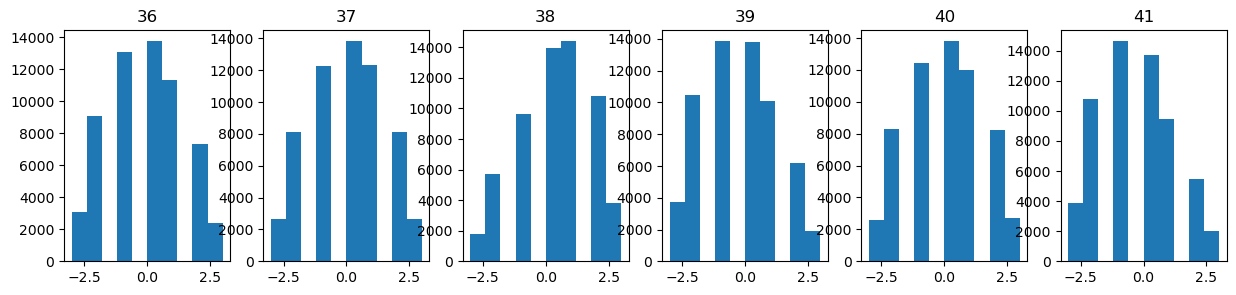

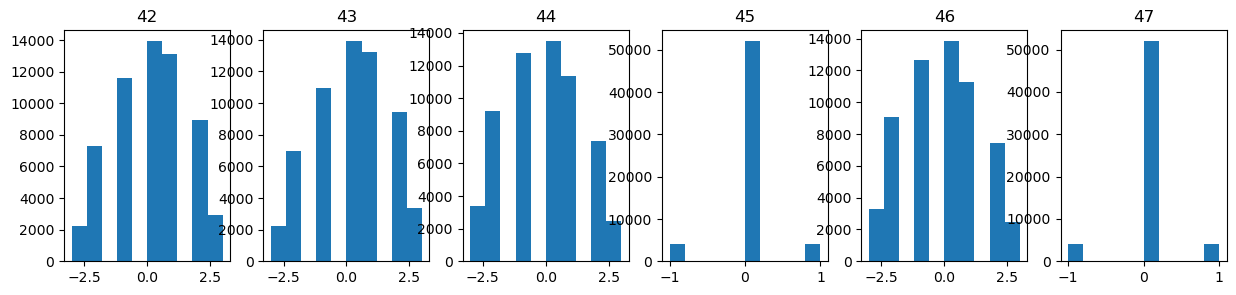

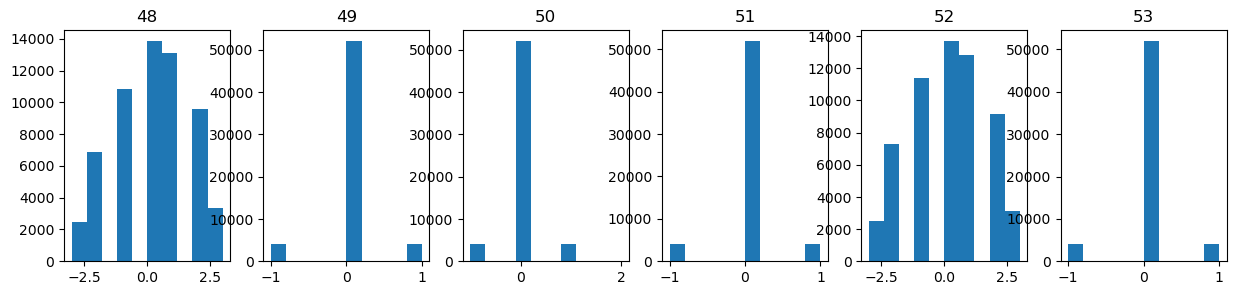

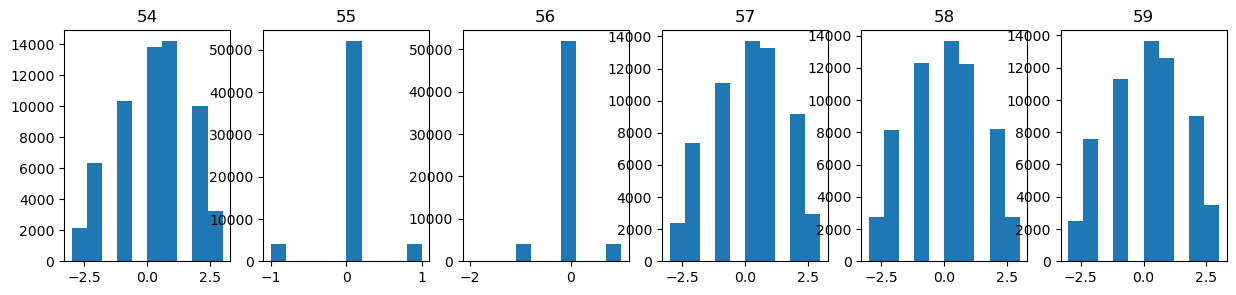

In [28]:
# Plotando histogramas para cada personalidade
for i in range(10): 
    fig, axs = plt.subplots(1, 6, figsize=(15, 3))  
    for j in range(6):  
        axs[j].hist(person.iloc[:, i*6 + j].dropna())
        axs[j].set_title(j + i*6) #Como os títulos sao muito grandes, decidi mudar para o numero da coluna

#Não estou gostando no estilo do histograma, vou mudar depois
plt.show()